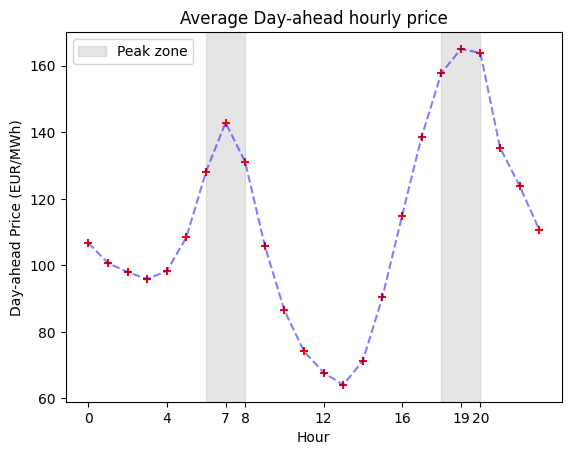

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

df = pd.read_csv('../data/clean_data.csv')
# df['Day-ahead Price (EUR/MWh)'].plot(figsize=(15,5), title='Hourly Day-ahead prices')
daily_avg = df.groupby('Hour')['Day-ahead Price (EUR/MWh)'].mean().reset_index()

x = daily_avg['Hour']
y = daily_avg['Day-ahead Price (EUR/MWh)']

peaks, _ = find_peaks(y)
for i in range(len(peaks)):
    if i==0:
        plt.axvspan(peaks[i]-1, peaks[i]+1, color='gray', alpha=0.2, label='Peak zone')
    else:
        plt.axvspan(peaks[i]-1, peaks[i]+1, color='gray', alpha=0.2)

default_ticks = list(x)[0::4]
combined_ticks = sorted(set(default_ticks + list(x.iloc[peaks])))

plt.xticks(ticks=combined_ticks, labels=combined_ticks)
plt.scatter(x, y, marker='+', color='r')
plt.plot(x, y, linestyle='--', color='b',alpha=0.5)
plt.title('Average Day-ahead hourly price')
plt.xlabel('Hour')
plt.ylabel('Day-ahead Price (EUR/MWh)')
plt.legend()

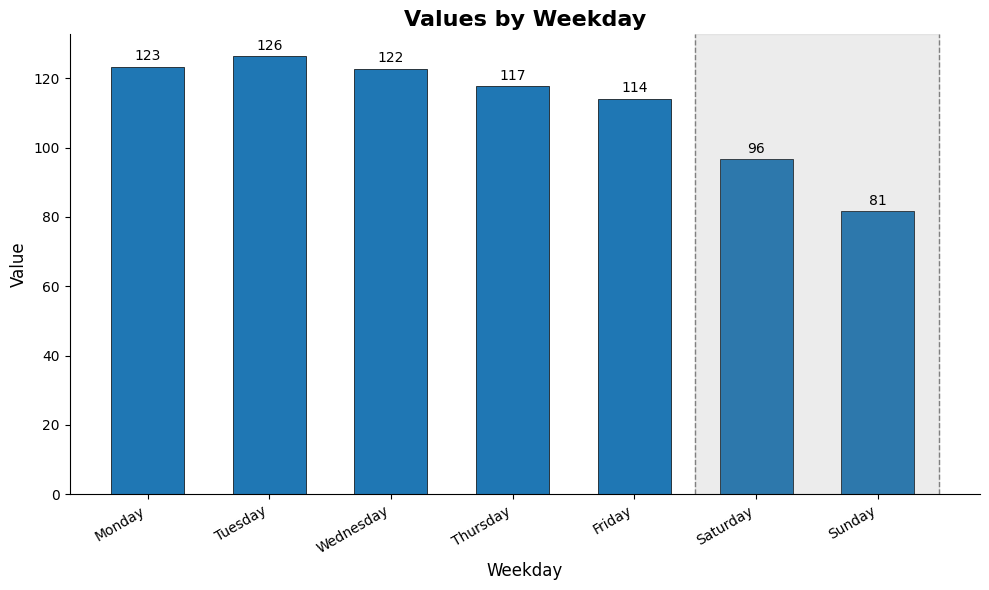

In [102]:
df_weekday = df.groupby('Weekday')['Day-ahead Price (EUR/MWh)'].mean().reset_index()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday['Weekday'] = pd.Categorical(df_weekday['Weekday'], categories=weekday_order, ordered=True)
df_weekday = df_weekday.sort_values('Weekday')

# plt.bar(df_weekday['Weekday'], df_weekday['Day-ahead Price (EUR/MWh)'])

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Choose a clean, soft color
bar_color = '#1f77b4'  # Blue from Matplotlib default palette
edge_color = 'black'

# Plot bars
bars = ax.bar(df_weekday['Weekday'], df_weekday['Day-ahead Price (EUR/MWh)'], width=0.6, color=bar_color, edgecolor=edge_color, linewidth=0.5)

# Add dotted vertical lines before Saturday and after Sunday
ax.axvline(x=4.5, color='gray', linestyle='--', linewidth=1)  # Between Friday and Saturday
ax.axvline(x=6.5, color='gray', linestyle='--', linewidth=1)  # After Sunday
ax.axvspan(4.5, 6.5, color='gray', alpha=0.15)

# Add data labels above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, int(height),
            ha='center', va='bottom', fontsize=10)

# Titles and labels
ax.set_title('Values by Weekday', fontsize=16, fontweight='bold')
ax.set_xlabel('Weekday', fontsize=12)
ax.set_ylabel('Value', fontsize=12)

# Improve x-axis readability
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Make layout tighter
plt.tight_layout()

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)